# importing required packages

- import numpy for linear algebra
- import pandas for loading the dataset, data processing
- import matplotlib and seaborn for visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib
# import scipy as sp
# from subprocess import check_output # #print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
import boto3
import s3fs

In [3]:
import os

# Load the datasets

- to take the sample :
    - we sample() function of pandas to extract sample from pandas.dataframe, using the random sampling method

In [4]:
client = boto3.client('s3')

In [5]:
path = 's3://nyc-taxi-system/Final_dataset.csv'

In [6]:
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
0,0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1.0,1.28,1.0,N,162,230,...,17.00,2.5,Midtown East,Manhattan,40.759822,-73.972471,Times Sq/Theatre District,Manhattan,40.758168,-73.985525
1,1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1.0,1.90,1.0,N,141,164,...,18.41,2.5,Lenox Hill West,Manhattan,40.769382,-73.959474,Midtown South,Manhattan,40.749842,-73.984251
2,2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1.0,1.70,1.0,N,239,163,...,14.75,2.5,Upper West Side South,Manhattan,40.769244,-73.990767,Midtown North,Manhattan,40.765203,-73.985104
3,3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1.0,1.08,1.0,N,142,48,...,11.76,2.5,Lincoln Square East,Manhattan,40.775707,-73.991420,Clinton East,Manhattan,40.760660,-73.990216
4,4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1.0,2.94,1.0,N,236,107,...,16.30,2.5,Upper East Side North,Manhattan,40.764873,-73.961511,Gramercy,Manhattan,40.735519,-73.984079
5,5,2.0,2020-01-19 09:58:04,2020-01-19 10:04:47,1.0,1.44,1.0,N,75,262,...,12.36,2.5,East Harlem South,Manhattan,40.800919,-73.929515,Yorkville East,Manhattan,40.783251,-73.944720
6,6,1.0,2020-01-23 10:30:36,2020-01-23 10:48:32,2.0,2.60,1.0,N,238,237,...,18.30,2.5,Upper West Side North,Manhattan,40.781960,-73.981243,Upper East Side South,Manhattan,40.779468,-73.958265
7,7,1.0,2020-01-17 07:47:59,2020-01-17 08:32:35,1.0,15.00,1.0,N,132,179,...,56.15,0.0,JFK Airport,Queens,40.642948,-73.779373,Old Astoria,Queens,40.761947,-73.913902
8,8,1.0,2020-01-13 18:40:53,2020-01-13 18:45:03,1.0,0.70,1.0,N,162,162,...,10.55,2.5,Midtown East,Manhattan,40.759822,-73.972471,Midtown East,Manhattan,40.759822,-73.972471
9,9,2.0,2020-01-13 15:50:22,2020-01-13 16:41:44,1.0,20.72,2.0,N,141,132,...,61.42,2.5,Lenox Hill West,Manhattan,40.769382,-73.959474,JFK Airport,Queens,40.642948,-73.779373


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Exploratory Data Analysis ( EDA )

#### shape

- returns number of rows and columns

In [8]:
df.shape

(1200845, 26)

#### columns in dataset

- print the columns names

In [9]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'PU_latitude', 'PU_longitude', 'DO_zone', 'DO_borough', 'DO_latitude',
       'DO_longitude'],
      dtype='object')

#### Demographic information of Customer & Vendor

    1. 'VendorID' – code indicating the TPER ( Taxicab and Livery Passeng  er ENchancement Programs (TPEP ) provider that provided the record	
	2. 'tpep_pickup_datetime' – pick up date and time 
	3. 'tpep_dropoff_datetime' – drop off date and time
    4. 'passenger_count' – passenger count 
	5. 'trip_distance' – elapsed trip distance in miles reported by the taximeter 
	6. 'RatecodeID' – final rate code effect at the end of the trip
		1 – Standard Rate
		2 – JFK
		3 – Newark
		4 – Nassau
		5 – Negotiated fare
		6 – group ride
	7. 'store_and_fwd_flag' – flag indicated whether the trip record was held in vehicle
		Y – store and forward trip
		N – not a store and forward trip
    8. 'PULocationID' – TLC Taxi zone in which taximeter was engaged 
	9. 'DOLocationID' – TLC Taxi zone in whoch taximeter was disengaged 
	10. 'payment_type' – numeric code signifying the payment mode
		1 – credit card
		2 – cash
		3 – no charge
		4 – dispute
		5 – unknown
		6 – voided trip
 	11. 'fare_amount' – time and distance fare calculated by the meter 
	12. 'extra' – miscellaneous extras and surcharges.
		1. Rush charge – 0.5 USD
		2. Overnight charge – 1 USD
    13. 'mta_tax' – 0.50 MTA tax, automatically added 
	14. 'tip_amount' – tip amount. field is automatically populated for credit card tips., cash tips are not included. 
	15. 'tolls_amount' – total amount of all tolls paid in trip 
	16. 'improvement_surcharge' – 0.30 imporvement surcharge assessed trips at the flag drop.
        17. 'total_amount' – total amount charged to passengers. Does not include cash tips. 
	18. 'congestion_surcharge' – additional charge added to base charge during unusal events like strikes, bad winter, major port fires.
    19. zone_x - pick up zone
    20. borough_x - pick up borough
    21. PUlatitude - pick up latitude
    22. PUlongitude - pick up longitude
    23. zone_y - drop off zone
    24. borough_y - drop off borough
    25. DOlatitude - drop off latitude
    26. DOlongitude - drop off longitude

#### info()

- it will tell you how many entries you have, the names of each column, the data type of each column, and how many non-null values you have in each column

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200845 entries, 0 to 1200844
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1139472 non-null  float64
 1   tpep_pickup_datetime   1200845 non-null  object 
 2   tpep_dropoff_datetime  1200845 non-null  object 
 3   passenger_count        1139472 non-null  float64
 4   trip_distance          1200845 non-null  float64
 5   RatecodeID             1139472 non-null  float64
 6   store_and_fwd_flag     1139472 non-null  object 
 7   PULocationID           1200845 non-null  int64  
 8   DOLocationID           1200845 non-null  int64  
 9   payment_type           1139472 non-null  float64
 10  fare_amount            1200845 non-null  float64
 11  extra                  1200845 non-null  float64
 12  mta_tax                1200845 non-null  float64
 13  tip_amount             1200845 non-null  float64
 14  tolls_amount      

###### descriptive statistics

- Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. 
- The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. 
- Any missing value or NaN value is automatically skipped. 

In [11]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PU_latitude,PU_longitude,DO_latitude,DO_longitude
count,1.139472e+06,1.139472e+06,1.200845e+06,1.139472e+06,1.200845e+06,1.200845e+06,1.139472e+06,1.200845e+06,1.200845e+06,1.200845e+06,1.200845e+06,1.200845e+06,1.200845e+06,1.200845e+06,1.200845e+06,1.187920e+06,1.187920e+06,1.189321e+06,1.189321e+06
mean,1.659879e+00,1.445271e+00,4.038730e+00,1.046081e+00,1.632398e+02,1.601422e+02,1.296148e+00,1.286546e+01,1.043666e+00,4.926146e-01,2.027734e+00,3.193841e-01,2.973968e-01,1.850169e+01,2.164516e+00,4.083315e+01,-7.411041e+01,4.083103e+01,-7.409523e+01
std,4.737608e-01,1.089290e+00,3.386339e+02,7.588837e-01,6.748030e+01,7.162308e+01,4.950882e-01,1.207856e+01,1.245262e+00,7.991255e-02,2.678089e+00,1.752261e+00,3.868096e-02,1.419788e+01,8.754143e-01,4.739117e-01,8.703928e-01,4.628931e-01,8.416128e-01
min,1.000000e+00,0.000000e+00,-2.727000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+02,-2.650000e+01,-5.000000e-01,-9.300000e+01,-2.075000e+01,-3.000000e-01,-4.008000e+02,-2.500000e+00,4.050847e+01,-7.943939e+01,4.050847e+01,-7.943939e+01
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,4.074106e+01,-7.399142e+01,4.073955e+01,-7.399136e+01
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.610000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,4.075982e+01,-7.398408e+01,4.075982e+01,-7.398124e+01
75%,2.000000e+00,1.000000e+00,3.170000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00,4.077571e+01,-7.396151e+01,4.077571e+01,-7.396151e+01
max,4.000000e+00,9.000000e+00,2.560691e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.030200e+02,1.850000e+01,3.080000e+01,5.930000e+02,8.861200e+02,3.000000e-01,1.042820e+03,2.750000e+00,4.481079e+01,-7.251533e+01,4.481079e+01,-7.251533e+01


###### checking the missing values

In [12]:
df.isna().sum()

VendorID                 61373
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          61373
trip_distance                0
RatecodeID               61373
store_and_fwd_flag       61373
PULocationID                 0
DOLocationID                 0
payment_type             61373
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                  12925
PU_borough               12925
PU_latitude              12925
PU_longitude             12925
DO_zone                  11524
DO_borough               11524
DO_latitude              11524
DO_longitude             11524
dtype: int64

#### Conclusion:


- The fare_amount variable has negative value as minimum value which is unusual
- The passenger_count variable having 0 as minimum no of passengers
- The pickup and dropoff zone's location_Id shouldn't be greter than 263

## Data Cleansing

###### missing values

In [13]:
ndf=df.isnull()
ndf.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
count,1200845,1200845,1200845,1200845,1200845,1200845,1200845,1200845,1200845,1200845,...,1200845,1200845,1200845,1200845,1200845,1200845,1200845,1200845,1200845,1200845
unique,2,1,1,2,1,2,2,1,1,2,...,1,1,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1139472,1200845,1200845,1139472,1200845,1139472,1139472,1200845,1200845,1139472,...,1200845,1200845,1187920,1187920,1187920,1187920,1189321,1189321,1189321,1189321


#### cleansing the data

In [14]:
df.isna().sum()

VendorID                 61373
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          61373
trip_distance                0
RatecodeID               61373
store_and_fwd_flag       61373
PULocationID                 0
DOLocationID                 0
payment_type             61373
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                  12925
PU_borough               12925
PU_latitude              12925
PU_longitude             12925
DO_zone                  11524
DO_borough               11524
DO_latitude              11524
DO_longitude             11524
dtype: int64

In [15]:
# df = df.replace('0', np.nan)

In [16]:
df=df.dropna()

In [17]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PU_zone                  0
PU_borough               0
PU_latitude              0
PU_longitude             0
DO_zone                  0
DO_borough               0
DO_latitude              0
DO_longitude             0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125325 entries, 0 to 1200843
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1125325 non-null  float64
 1   tpep_pickup_datetime   1125325 non-null  object 
 2   tpep_dropoff_datetime  1125325 non-null  object 
 3   passenger_count        1125325 non-null  float64
 4   trip_distance          1125325 non-null  float64
 5   RatecodeID             1125325 non-null  float64
 6   store_and_fwd_flag     1125325 non-null  object 
 7   PULocationID           1125325 non-null  int64  
 8   DOLocationID           1125325 non-null  int64  
 9   payment_type           1125325 non-null  float64
 10  fare_amount            1125325 non-null  float64
 11  extra                  1125325 non-null  float64
 12  mta_tax                1125325 non-null  float64
 13  tip_amount             1125325 non-null  float64
 14  tolls_amount      

## Data Preprocessing

In [19]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'PU_latitude', 'PU_longitude', 'DO_zone', 'DO_borough', 'DO_latitude',
       'DO_longitude'],
      dtype='object')

In [20]:
df = df.rename(columns={"PU_latitude":"pickup_latitude", "PU_longitude":"pickup_longitude", "DO_latitude":"dropoff_latitude", "DO_longitude":"dropoff_longitude", "tpep_pickup_datetime":"pickup_datetime"})
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,pickup_latitude,pickup_longitude,DO_zone,DO_borough,dropoff_latitude,dropoff_longitude
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1.0,1.28,1.0,N,162,230,1.0,...,17.00,2.5,Midtown East,Manhattan,40.759822,-73.972471,Times Sq/Theatre District,Manhattan,40.758168,-73.985525
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1.0,1.90,1.0,N,141,164,1.0,...,18.41,2.5,Lenox Hill West,Manhattan,40.769382,-73.959474,Midtown South,Manhattan,40.749842,-73.984251
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1.0,1.70,1.0,N,239,163,1.0,...,14.75,2.5,Upper West Side South,Manhattan,40.769244,-73.990767,Midtown North,Manhattan,40.765203,-73.985104
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1.0,1.08,1.0,N,142,48,1.0,...,11.76,2.5,Lincoln Square East,Manhattan,40.775707,-73.991420,Clinton East,Manhattan,40.760660,-73.990216
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1.0,2.94,1.0,N,236,107,1.0,...,16.30,2.5,Upper East Side North,Manhattan,40.764873,-73.961511,Gramercy,Manhattan,40.735519,-73.984079


In [21]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())
min_max()

-72.515328 -79.439392
44.8107911 40.50847483
-72.515328 -79.439392
44.8107911 40.50847483


In [22]:
# def coordinate_data():
#     print(df[(df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0) ]['pickup_longitude'].count())
#     print(df[(df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0) ]['pickup_latitude'].count())
#     print(df[(df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0)]['dropoff_longitude'].count())
#     print(df[(df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0) ]['dropoff_latitude'].count())

# coordinate_data()

In [23]:
# df=df[~((df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0))]
# df=df[~((df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0))]
# df=df[~((df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0))]
# df=df[~((df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0))]

# # call function to check
# coordinate_data()
# min_max()

In [24]:
# remove where pickup and drop location are same
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(66146, 26)


In [25]:
df.shape

(1059179, 26)

In [26]:
#boundary for new york latitude longitude...

boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [27]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

28557
30128
28399
32868


In [28]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(994717, 26)

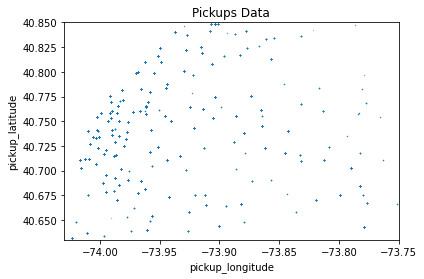

In [29]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

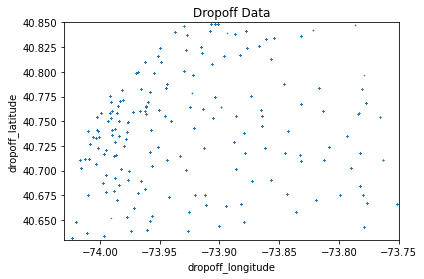

In [30]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Passenger Count Data

In [31]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

7
0


<AxesSubplot:xlabel='count', ylabel='passenger_count'>

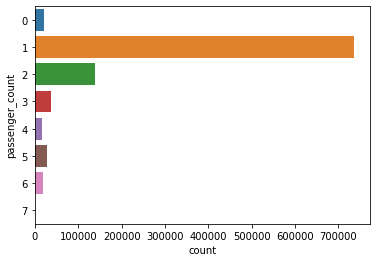

In [32]:
sns.countplot(y='passenger_count',data=df)

In [33]:
df=df[~((df['passenger_count']>6))]
df.shape

(994715, 26)

In [34]:
df[df['fare_amount']<=0]['fare_amount'].count()
df=df[~(df['fare_amount']<=0)]
df.shape

(991676, 26)

## Feature Engineering

Extract day,month,year from pickup_datetime

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991676 entries, 0 to 1200843
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               991676 non-null  float64
 1   pickup_datetime        991676 non-null  object 
 2   tpep_dropoff_datetime  991676 non-null  object 
 3   passenger_count        991676 non-null  int32  
 4   trip_distance          991676 non-null  float64
 5   RatecodeID             991676 non-null  float64
 6   store_and_fwd_flag     991676 non-null  object 
 7   PULocationID           991676 non-null  int64  
 8   DOLocationID           991676 non-null  int64  
 9   payment_type           991676 non-null  float64
 10  fare_amount            991676 non-null  float64
 11  extra                  991676 non-null  float64
 12  mta_tax                991676 non-null  float64
 13  tip_amount             991676 non-null  float64
 14  tolls_amount           991676 non-n

In [36]:
type(df['pickup_datetime'].iloc[0])

str

In [37]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
type(df['pickup_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
# df.head()

In [39]:
# df['pickup_day']=df['pickup_datetime'].apply(lambda time:time.day)

In [40]:
# df.head()

In [41]:
df['pickup_day']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UT').dt.day
df['pickup_month']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df['pickup_year']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year

In [42]:
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PU_borough,pickup_latitude,pickup_longitude,DO_zone,DO_borough,dropoff_latitude,dropoff_longitude,pickup_day,pickup_month,pickup_year
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.28,1.0,N,162,230,1.0,...,Manhattan,40.759822,-73.972471,Times Sq/Theatre District,Manhattan,40.758168,-73.985525,28,1,2020
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,1.90,1.0,N,141,164,1.0,...,Manhattan,40.769382,-73.959474,Midtown South,Manhattan,40.749842,-73.984251,14,1,2020
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,1.70,1.0,N,239,163,1.0,...,Manhattan,40.769244,-73.990767,Midtown North,Manhattan,40.765203,-73.985104,21,1,2020
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.08,1.0,N,142,48,1.0,...,Manhattan,40.775707,-73.991420,Clinton East,Manhattan,40.760660,-73.990216,29,1,2020
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,2.94,1.0,N,236,107,1.0,...,Manhattan,40.764873,-73.961511,Gramercy,Manhattan,40.735519,-73.984079,4,1,2020


Let's extract weekday from pickup_datetime

0 Monday

6 Sunday

In [43]:
df['pickup_weekday'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek

Seprate pickup hour from pickup_datetime column

In [44]:
df['pickup_hour']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_longitude,DO_zone,DO_borough,dropoff_latitude,dropoff_longitude,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.28,1.0,N,162,230,1.0,...,-73.972471,Times Sq/Theatre District,Manhattan,40.758168,-73.985525,28,1,2020,1,16
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,1.90,1.0,N,141,164,1.0,...,-73.959474,Midtown South,Manhattan,40.749842,-73.984251,14,1,2020,1,10
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,1.70,1.0,N,239,163,1.0,...,-73.990767,Midtown North,Manhattan,40.765203,-73.985104,21,1,2020,1,10
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.08,1.0,N,142,48,1.0,...,-73.991420,Clinton East,Manhattan,40.760660,-73.990216,29,1,2020,2,14
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,2.94,1.0,N,236,107,1.0,...,-73.961511,Gramercy,Manhattan,40.735519,-73.984079,4,1,2020,5,14


Let's add the feature called mid night trip usually fare during night hours are high compare to day time

The trip between night 11'o clock to morning 5'o clock are labelled mid night trip

In [45]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,DO_zone,DO_borough,dropoff_latitude,dropoff_longitude,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.28,1.0,N,162,230,1.0,...,Times Sq/Theatre District,Manhattan,40.758168,-73.985525,28,1,2020,1,16,0
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,1.90,1.0,N,141,164,1.0,...,Midtown South,Manhattan,40.749842,-73.984251,14,1,2020,1,10,0
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,1.70,1.0,N,239,163,1.0,...,Midtown North,Manhattan,40.765203,-73.985104,21,1,2020,1,10,0
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.08,1.0,N,142,48,1.0,...,Clinton East,Manhattan,40.760660,-73.990216,29,1,2020,2,14,0
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,2.94,1.0,N,236,107,1.0,...,Gramercy,Manhattan,40.735519,-73.984079,4,1,2020,5,14,0


New York City has rush hour means heavy traffic from 4 PM to 8 PM

So fare rates may differ from other %time

In [46]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,DO_borough,dropoff_latitude,dropoff_longitude,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.28,1.0,N,162,230,1.0,...,Manhattan,40.758168,-73.985525,28,1,2020,1,16,0,1
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,1.90,1.0,N,141,164,1.0,...,Manhattan,40.749842,-73.984251,14,1,2020,1,10,0,0
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,1.70,1.0,N,239,163,1.0,...,Manhattan,40.765203,-73.985104,21,1,2020,1,10,0,0
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.08,1.0,N,142,48,1.0,...,Manhattan,40.760660,-73.990216,29,1,2020,2,14,0,0
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,2.94,1.0,N,236,107,1.0,...,Manhattan,40.735519,-73.984079,4,1,2020,5,14,0,0


During snow season the taxi is very less available compare to other months i.e. taxi fare during snow season is high.

NYC has the snow season from December to March but December and March has less snow compare to Jan and Feb

So we will check if trip was in month of Jan and Feb it is during snow season

In [47]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_latitude,dropoff_longitude,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.28,1.0,N,162,230,1.0,...,40.758168,-73.985525,28,1,2020,1,16,0,1,1
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,1.90,1.0,N,141,164,1.0,...,40.749842,-73.984251,14,1,2020,1,10,0,0,1
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,1.70,1.0,N,239,163,1.0,...,40.765203,-73.985104,21,1,2020,1,10,0,0,1
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.08,1.0,N,142,48,1.0,...,40.760660,-73.990216,29,1,2020,2,14,0,0,1
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,2.94,1.0,N,236,107,1.0,...,40.735519,-73.984079,4,1,2020,5,14,0,0,1


### Distance calculator between pickup and drop coordinates

Distance and the fare amount has the direct correlation if distance increase fare will be increase

We will use python's geopy library to add column trip_distance which will have distance between two coordinates

In [48]:
from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).km
    return dist

In [49]:
df['trip_distance']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_latitude,dropoff_longitude,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.117467,1.0,N,162,230,1.0,...,40.758168,-73.985525,28,1,2020,1,16,0,1,1
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,3.014244,1.0,N,141,164,1.0,...,40.749842,-73.984251,14,1,2020,1,10,0,0,1
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,0.655717,1.0,N,239,163,1.0,...,40.765203,-73.985104,21,1,2020,1,10,0,0,1
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.674045,1.0,N,142,48,1.0,...,40.760660,-73.990216,29,1,2020,2,14,0,0,1
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,3.776038,1.0,N,236,107,1.0,...,40.735519,-73.984079,4,1,2020,5,14,0,0,1


In [50]:
from math import radians, cos, sin, asin, sqrt

def haversine_distance(row):
#     lon1, lat1, lon2, lat2):
    """
    Calculate the circle distance between two points in lat and lon
    on the earth (specified in decimal degrees)
    returning distance in miles
    """
    # need to convert decimal degrees to radians 
    # a unit of angle, equal to an angle at the center of a circle whose arc is equal in length to the radius.
    lon1, lat1, lon2, lat2 = row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
#applying to the dataset
df['haversine_distance'] = df.apply(haversine_distance, axis=1)

In [51]:
df.columns

Index(['VendorID', 'pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'pickup_latitude', 'pickup_longitude', 'DO_zone', 'DO_borough',
       'dropoff_latitude', 'dropoff_longitude', 'pickup_day', 'pickup_month',
       'pickup_year', 'pickup_weekday', 'pickup_hour', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'haversine_distance'],
      dtype='object')

In [52]:
df1 = df[['trip_distance', 'haversine_distance']]
df1.head()

,trip_distance,haversine_distance
0,1.117467,1.114739
1,3.014244,3.012602
2,0.655717,0.655233
3,1.674045,1.676215
4,3.776038,3.777291


### Mapping

### Convert specific pickup and drop Coordinates into location

We have set the boundary for the JFK Airport, Manhattan, Brooklyn, LaGuardia, Bronx

In [53]:
#JFK Airport 
JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LaGuardia
LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

In [54]:
def pickup_place(place,train):
    data=train[((train['pickup_latitude']>= place['min_lat']) & (train['pickup_latitude']<= place['max_lat']) & (train['pickup_longitude']>= place['min_long']) & (train['pickup_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , pickup_place(JFK,df).shape)
print("Manhattan Pickup Total " , pickup_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , pickup_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , pickup_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , pickup_place(LaGuardia,df).shape)

JFK Pickup Total  (25612, 35)
Manhattan Pickup Total  (904433, 35)
Brroklyn Pickup Total  (4854, 35)
Bronx Pickup Total  (15833, 35)
LaGuardia Pickup Total  (19162, 35)


In [55]:
def drop_place(place,train):
    data=train[((train['dropoff_latitude']>= place['min_lat']) & (train['dropoff_latitude']<= place['max_lat']) & (train['dropoff_longitude']>= place['min_long']) & (train['dropoff_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , drop_place(JFK,df).shape)
print("Manhattan Pickup Total " , drop_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , drop_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , drop_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , drop_place(LaGuardia,df).shape)

JFK Pickup Total  (5039, 35)
Manhattan Pickup Total  (877370, 35)
Brroklyn Pickup Total  (16786, 35)
Bronx Pickup Total  (29094, 35)
LaGuardia Pickup Total  (6747, 35)


In [56]:
def plotPickupAreaEachPlace(Area,data,ax):
    d=pickup_place(Area,data)
    d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

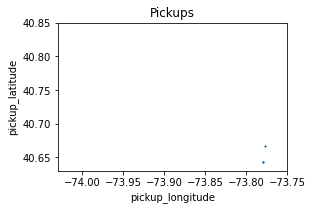

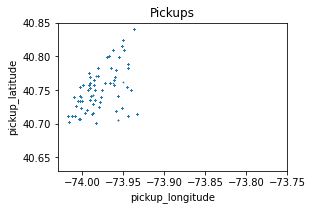

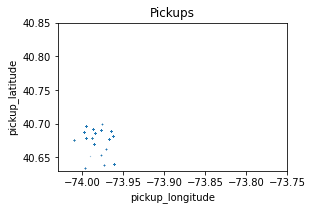

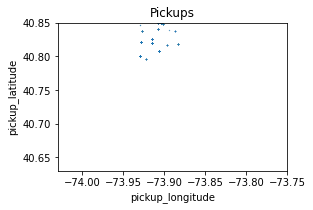

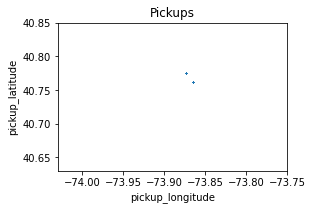

In [57]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

In [58]:
def plotDropAreaEachPlace(Area,data,ax):
    d=drop_place(Area,data)
    d.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

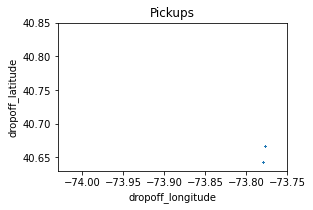

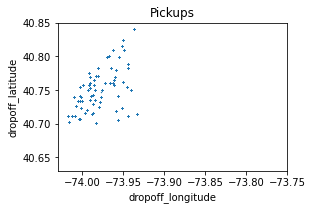

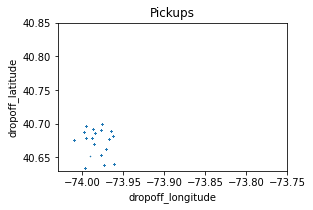

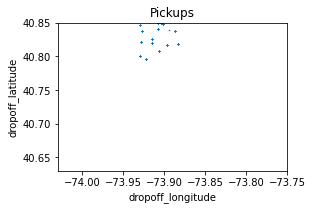

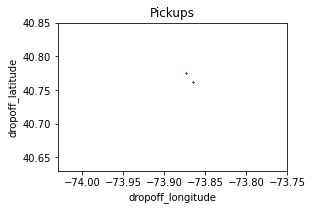

In [59]:
ax=plt.subplot(2,3,1)
plotDropAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotDropAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotDropAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotDropAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotDropAreaEachPlace(LaGuardia,df,ax)

place_mapping function which will take lat,lang and bounday area varibale it will map to particular area

It will return 1 if particular lat,lang's are within specific boundary.

e.g pickup coordinates which are within boundary for JFK Airport said to be JFK pickup trip and vice versa for drop

In [60]:
def place_mapping(lat,lang,place_area):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [61]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia),axis=1)

In [62]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia),axis=1)

Airport trip has the fixed rate so it is good to have a column which show whether trip is airport trip or not

In [63]:
def isAirportTrip(pickupJFK,dropJFK,pickupLaG,dropLaG):    
    if pickupJFK==1 or dropJFK==1 or pickupLaG==1 or dropLaG==1:
        return 1
    return 0

In [64]:
df['isAirportTrip']=df.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

Till here we have pre-processed our data and feature engineering done

In [65]:
df.head()

,VendorID,pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_jfk,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_manhattan,drop_jfk,drop_brooklyn,drop_bronx,drop_laGuardia,isAirportTrip
0,2.0,2020-01-28 16:08:01,2020-01-28 16:22:32,1,1.117467,1.0,N,162,230,1.0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,2020-01-14 10:58:44,2020-01-14 11:19:41,1,3.014244,1.0,N,141,164,1.0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,2020-01-21 10:09:24,2020-01-21 10:20:27,1,0.655717,1.0,N,239,163,1.0,...,0,0,0,0,1,0,0,0,0,0
3,2.0,2020-01-29 14:13:06,2020-01-29 14:20:08,1,1.674045,1.0,N,142,48,1.0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,2020-01-04 14:06:36,2020-01-04 14:20:38,1,3.776038,1.0,N,236,107,1.0,...,0,0,0,0,1,0,0,0,0,0


### Save the pre-processed and feature_eng data in CSV file

In [66]:
df.to_csv("./feature_model.csv",index=False)

### Read Pre-processed file

In [67]:
df=pd.read_csv("./feature_model.csv")
df.shape

(991676, 46)

## Data Visualization

The next step is to get insight to data.

Remove any noisy or outlier data and understand data distribution

In [68]:
df.columns

Index(['VendorID', 'pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'pickup_latitude', 'pickup_longitude', 'DO_zone', 'DO_borough',
       'dropoff_latitude', 'dropoff_longitude', 'pickup_day', 'pickup_month',
       'pickup_year', 'pickup_weekday', 'pickup_hour', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia', 'isAirportTrip'],
      dtype='object')

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


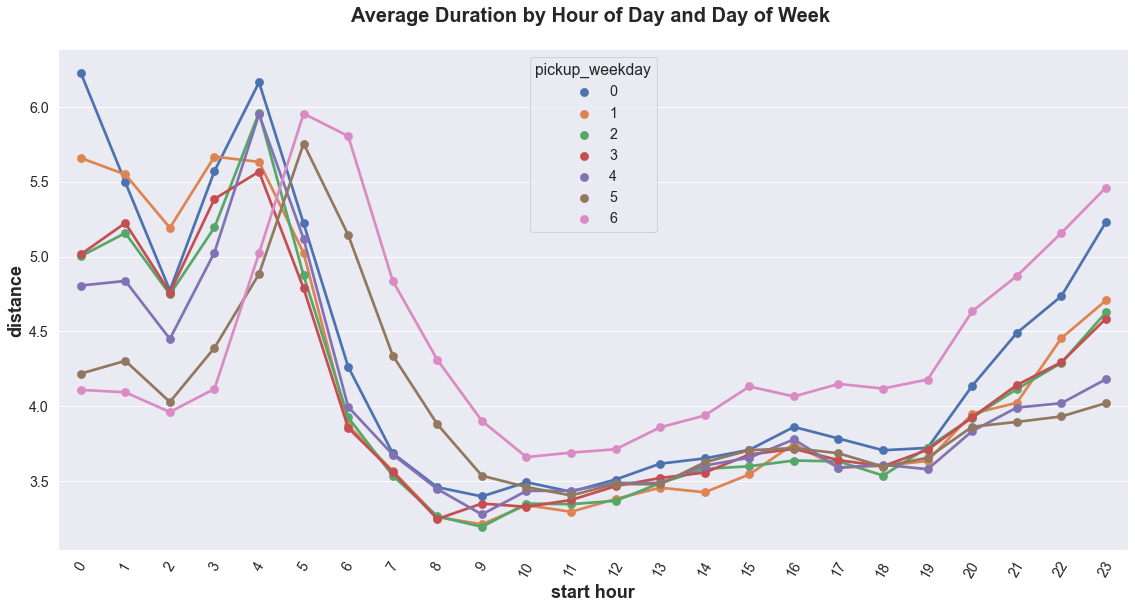

In [69]:
sns.set(font_scale=1.3)
g = sns.factorplot('pickup_hour', 
                   'haversine_distance', 
                   hue = 'pickup_weekday', 
                   estimator = np.mean, 
                   data = df, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title('Average Duration by Hour of Day and Day of Week \n',weight='bold', size = 20)
plt.xlabel('start hour', size = 18,weight = 'bold')
plt.ylabel('distance', size = 18,weight = 'bold')
g.set_xticklabels(rotation=60)

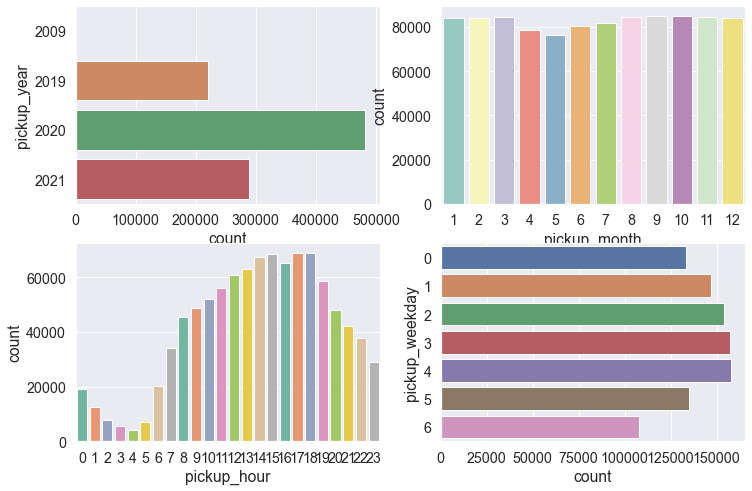

In [70]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df)
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set3')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df)

plt.show()

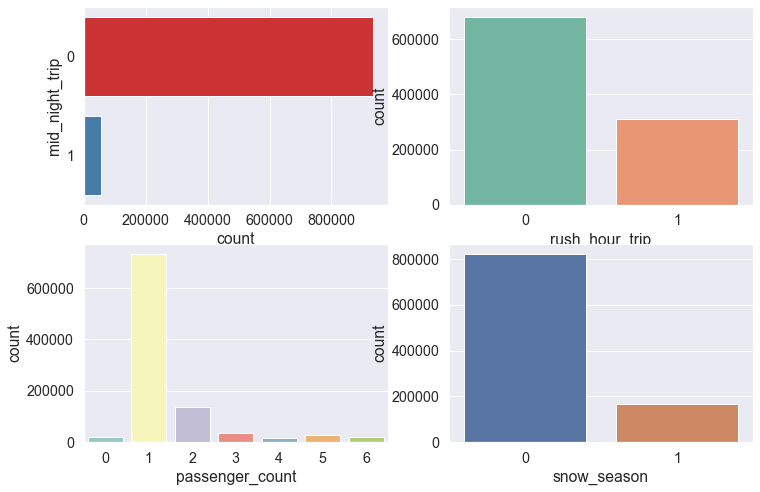

In [71]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df,palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df,palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='passenger_count', data=df,palette='Set3')

plt.subplot(2,2,4)
sns.countplot(x='snow_season', data=df)

plt.show()

<AxesSubplot:xlabel='isAirportTrip', ylabel='count'>

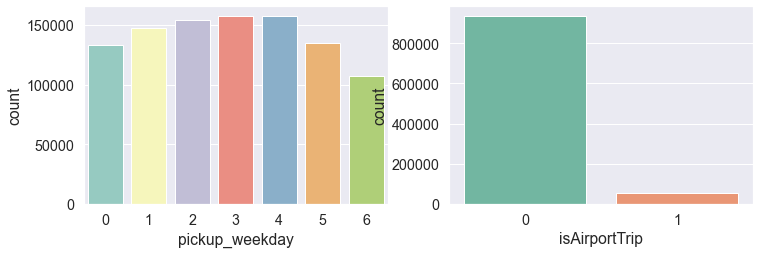

In [72]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x='pickup_weekday',data=df,palette='Set3')

plt.subplot(2,2,2)
sns.countplot(x='isAirportTrip',data=df,palette='Set2')

### Pickup Location Count Plot

<AxesSubplot:xlabel='pickup_laGuardia', ylabel='count'>

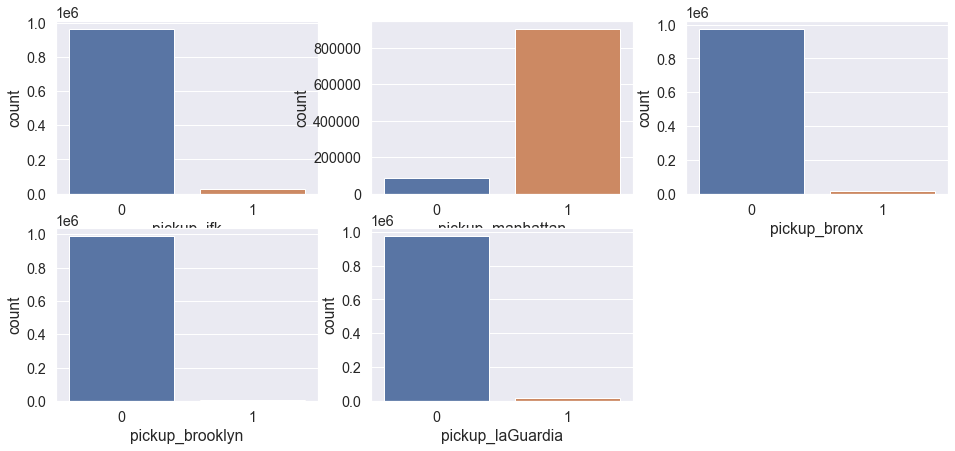

In [73]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='pickup_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='pickup_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='pickup_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='pickup_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='pickup_laGuardia',data=df)
# plt.show()

### Drop Location Count Plot

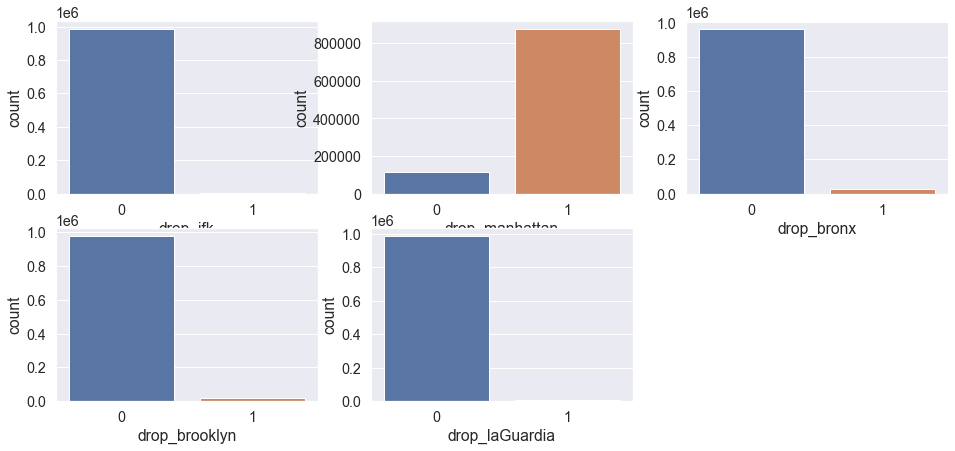

In [74]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='drop_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='drop_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='drop_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='drop_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='drop_laGuardia',data=df)
plt.show()

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array w

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

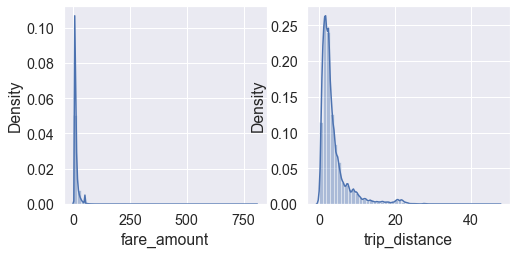

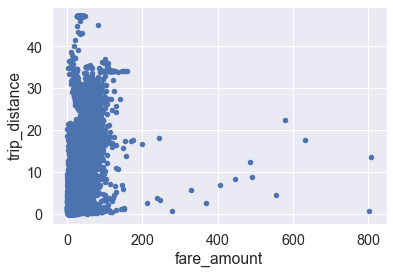

In [75]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df['fare_amount'],kde=True)

plt.subplot(2,2,2)
sns.distplot(df['trip_distance'],kde=True)

df.plot(x='fare_amount',y='trip_distance',kind='scatter')

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

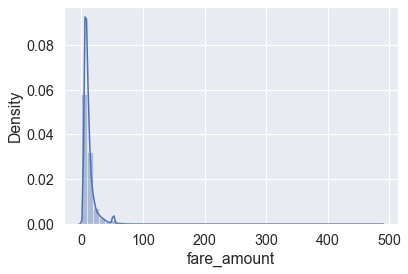

In [76]:
cancel_ride=df[(df['fare_amount']>=0) & (df['passenger_count']==0)]
sns.distplot(cancel_ride['fare_amount'],kde=True)

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

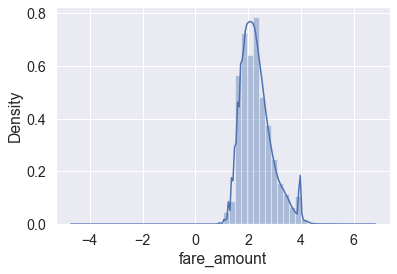

In [77]:
sns.distplot(np.log(df['fare_amount']),kde=True)

### Airport vs Non Aiport Trip Fare Distributinon

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


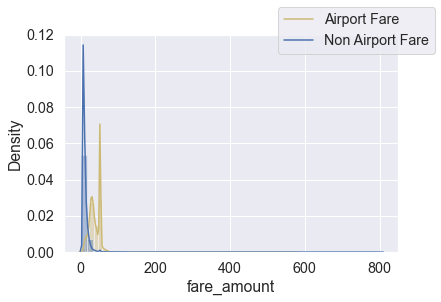

In [78]:
df_airport=df[df['isAirportTrip']==1]
df_non_airport=df[df['isAirportTrip']==0]

fig = plt.figure(figsize=(6,4))
sns.distplot(df_airport['fare_amount'],kde=True,color="y")
sns.distplot(df_non_airport['fare_amount'],kde=True)
fig.legend(labels=['Airport Fare','Non Airport Fare'])
plt.show()

### Different Area Fare Distribution

In [79]:
df_manhattan=df[(df['pickup_manhattan']==1) | (df['drop_manhattan']==1)]
df_jfk=df[(df['pickup_jfk']==1) | (df['drop_jfk']==1)]
df_bronx=df[(df['pickup_bronx']==1) | (df['drop_bronx']==1)]
df_brooklyn=df[(df['pickup_brooklyn']==1) | (df['drop_brooklyn']==1)]
df_LGD=df[(df['pickup_laGuardia']==1) | (df['drop_laGuardia']==1)]

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

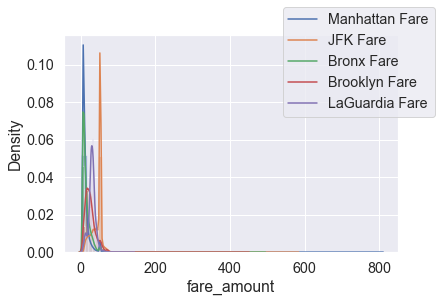

In [80]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df_manhattan['fare_amount'],kde=True)
sns.distplot(df_jfk['fare_amount'],kde=True)
sns.distplot(df_bronx['fare_amount'],kde=True)
sns.distplot(df_brooklyn['fare_amount'],kde=True)
sns.distplot(df_LGD['fare_amount'],kde=True)
fig.legend(labels=['Manhattan Fare','JFK Fare','Bronx Fare','Brooklyn Fare','LaGuardia Fare'])
plt.show()

### Fare Distribution of Manhattan

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

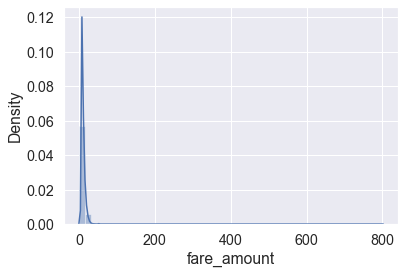

In [81]:
df_man=df[ (df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1)]
sns.distplot(df_man['fare_amount'],kde=True)

In [82]:
df_man['fare_amount'].sum()/df_man.shape[0]
df=df[~((df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1) & (df['fare_amount'] > 20))]

### Fare Distribution at Different Time Zone

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

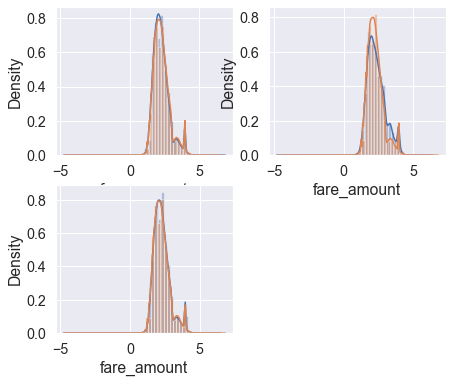

In [83]:
df_snow=df[df['snow_season']==1]
df_non_snow=df[df['snow_season']==0]

fig = plt.figure(figsize=(7,6))
ax=plt.subplot(2,2,1)
sns.distplot(np.log(df_snow['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_snow['fare_amount']),ax=ax)


df_mid=df[df['mid_night_trip']==1]
df_non_mid=df[df['mid_night_trip']==0]
ax=plt.subplot(2,2,2)
sns.distplot(np.log(df_mid['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_mid['fare_amount']),ax=ax)

df_rush_hour=df[df['rush_hour_trip']==1]
df_non_rush_hour=df[df['rush_hour_trip']==0]
ax=plt.subplot(2,2,3)
sns.distplot(np.log(df_rush_hour['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_rush_hour['fare_amount']),ax=ax)

### Correlation

In [84]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,pickup_jfk,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_manhattan,drop_jfk,drop_brooklyn,drop_bronx,drop_laGuardia,isAirportTrip
VendorID,1.000000,0.189517,-0.001349,0.006159,-0.005035,0.003146,-0.024876,0.003073,-0.865705,0.008656,...,0.017795,-0.006521,-0.011443,-0.001790,0.009848,0.001233,-0.000954,-0.009573,0.002772,0.012359
passenger_count,0.189517,1.000000,0.007931,0.002135,-0.001438,-0.001251,0.003117,0.014126,-0.159026,0.000032,...,0.011725,-0.001853,-0.008943,0.005329,0.002926,0.008645,-0.001740,-0.005775,0.005146,0.015734
trip_distance,-0.001349,0.007931,1.000000,0.191317,-0.059664,-0.085864,-0.001432,0.866278,-0.008547,-0.069147,...,0.564256,0.030673,0.041182,0.208788,-0.523951,0.293177,0.160756,0.132334,0.129141,0.642129
RatecodeID,0.006159,0.002135,0.191317,1.000000,-0.015378,-0.020245,-0.001329,0.208258,0.000834,-0.122223,...,0.157250,0.005730,-0.002434,-0.003096,-0.047689,0.134706,-0.004842,-0.000758,0.003049,0.149522
PULocationID,-0.005035,-0.001438,-0.059664,-0.015378,1.000000,0.033339,-0.047218,-0.083804,0.034573,0.001558,...,-0.072885,-0.087989,-0.150655,-0.058916,0.062329,-0.003106,-0.036604,-0.011235,0.002685,-0.083195
DOLocationID,0.003146,-0.001251,-0.085864,-0.020245,0.033339,1.000000,-0.050705,-0.116969,0.028484,0.038791,...,-0.049833,-0.036420,-0.027813,-0.025996,0.167476,-0.020353,-0.117758,-0.146351,-0.030027,-0.065761
payment_type,-0.024876,0.003117,-0.001432,-0.001329,-0.047218,-0.050705,1.000000,-0.005233,-0.008100,0.001440,...,0.044390,0.011281,0.042926,0.002201,-0.073910,-0.004681,-0.009559,0.061268,-0.011015,0.023274
fare_amount,0.003073,0.014126,0.866278,0.208258,-0.083804,-0.116969,-0.005233,1.000000,-0.013946,-0.119067,...,0.534944,0.037958,0.009700,0.253238,-0.460919,0.274507,0.192506,0.067576,0.168795,0.658828
extra,-0.865705,-0.159026,-0.008547,0.000834,0.034573,0.028484,-0.008100,-0.013946,1.000000,-0.007142,...,-0.019293,-0.030034,-0.041249,-0.026673,0.062798,0.012331,-0.014700,-0.032982,-0.015187,-0.027513
mta_tax,0.008656,0.000032,-0.069147,-0.122223,0.001558,0.038791,0.001440,-0.119067,-0.007142,1.000000,...,-0.006929,-0.003144,0.000112,-0.003455,0.053300,-0.006355,0.000502,0.000801,-0.003946,-0.009615


<AxesSubplot:>

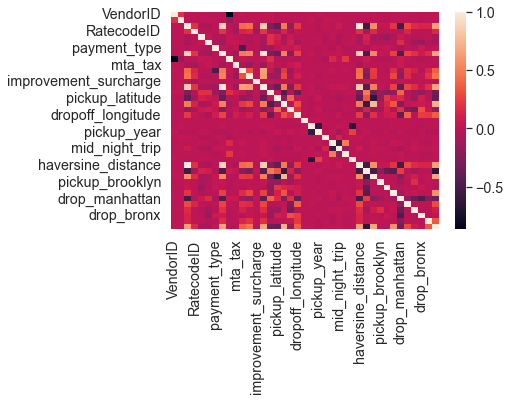

In [85]:
sns.heatmap(df.corr())

In [86]:
df.columns

Index(['VendorID', 'pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'pickup_latitude', 'pickup_longitude', 'DO_zone', 'DO_borough',
       'dropoff_latitude', 'dropoff_longitude', 'pickup_day', 'pickup_month',
       'pickup_year', 'pickup_weekday', 'pickup_hour', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia', 'isAirportTrip'],
      dtype='object')

In [87]:
df.shape

(960402, 46)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960402 entries, 0 to 991675
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               960402 non-null  float64
 1   pickup_datetime        960402 non-null  object 
 2   tpep_dropoff_datetime  960402 non-null  object 
 3   passenger_count        960402 non-null  int64  
 4   trip_distance          960402 non-null  float64
 5   RatecodeID             960402 non-null  float64
 6   store_and_fwd_flag     960402 non-null  object 
 7   PULocationID           960402 non-null  int64  
 8   DOLocationID           960402 non-null  int64  
 9   payment_type           960402 non-null  float64
 10  fare_amount            960402 non-null  float64
 11  extra                  960402 non-null  float64
 12  mta_tax                960402 non-null  float64
 13  tip_amount             960402 non-null  float64
 14  tolls_amount           960402 non-nu

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Profit is the dependent column
y = df['total_amount']

# start with nothing
x_names = []

# the previous r2
previous_r2 = -1

# list of all columns
columns = ['VendorID','passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 
           'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
           'pickup_latitude', 'pickup_longitude','dropoff_latitude', 'dropoff_longitude', 'pickup_day', 'pickup_month',
       'pickup_year', 'pickup_weekday', 'pickup_hour', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia', 'isAirportTrip']

# choose one col at a time and check its significance
for col in columns:
    
    # this will hold all the variables need to pass to the model
    temp_variables = []
    
    # add previously selected variable(s)
    temp_variables.extend(x_names)
    
    # add the current column
    temp_variables.append(col)
    
    print(f"selected columns {temp_variables}")
    
    # get all the variables in the form of a df
    x = df[temp_variables]
    
    # create model 
    model = LinearRegression()
    
    # train the model
    model.fit(x, y)
    
    # predict the values
    predictions = model.predict(x)
    
    # evaluate the model
    r2 = r2_score(y, predictions)

    print(f"previous r2 = {previous_r2}, current r2 = {r2}")
    
    # check if this is the first variable
    if previous_r2 == -1:
        previous_r2 = r2
        x_names.append(col)
        print(rf"since this is the first column, add ({col}) it to the list")
    else:
        # check if this r2 is greater than the previous one
        # if r2 > previous_r2:
        
        # check if the r2 difference is significant
        print(f"r2 - previous_r2 = {r2 - previous_r2}")
        if (r2 - previous_r2) >= 0.05:
            previous_r2 = r2
            x_names.append(col)
            print(f"found col: {col} increasing the r2 score")
        
        
print(f"finally selected columns = {x_names}")

selected columns ['VendorID']
previous r2 = -1, current r2 = 9.903803547051115e-05
since this is the first column, add (VendorID) it to the list
selected columns ['VendorID', 'passenger_count']
previous r2 = 9.903803547051115e-05, current r2 = 0.0002915984661150395
r2 - previous_r2 = 0.00019256043064452832
selected columns ['VendorID', 'trip_distance']
previous r2 = 9.903803547051115e-05, current r2 = 0.7075161286579292
r2 - previous_r2 = 0.7074170906224587
found col: trip_distance increasing the r2 score
selected columns ['VendorID', 'trip_distance', 'RatecodeID']
previous r2 = 0.7075161286579292, current r2 = 0.7106266798682261
r2 - previous_r2 = 0.003110551210296908
selected columns ['VendorID', 'trip_distance', 'PULocationID']
previous r2 = 0.7075161286579292, current r2 = 0.7077497714216117
r2 - previous_r2 = 0.00023364276368242898
selected columns ['VendorID', 'trip_distance', 'DOLocationID']
previous r2 = 0.7075161286579292, current r2 = 0.7080914467885444
r2 - previous_r2 = 0.0

#### Separate the independent and dependent relationship

In [90]:
x = df.drop(['pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'pickup_latitude', 'pickup_longitude', 'DO_zone', 'DO_borough',
       'dropoff_latitude', 'dropoff_longitude', 'pickup_day', 'pickup_month',
       'pickup_year', 'pickup_weekday', 'pickup_hour', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia', 'isAirportTrip'], axis=1).values
x 

array([[2.        , 1.11746673],
       [1.        , 3.01424377],
       [1.        , 0.65571652],
       ...,
       [2.        , 3.1020661 ],
       [1.        , 1.13912958],
       [2.        , 0.78207999]])

In [91]:
y = df['total_amount']

## LINEAR REGRESSION

#### Split the data into train and tests sets

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=864)

### Import linear regression algorithm from scikit

In [93]:
from sklearn.linear_model import LinearRegression
# creating model using LinearRegression algorithm
model = LinearRegression()

### Creating Model

In [94]:
# creating model 
model.fit(x_train,y_train)

LinearRegression()

### Testing the model

In [95]:
# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test,predictions)}")

r2_score : 0.7095181093337259
mean absolute error : 3.9335564294388634
mean squared error : 42.89385872677133


In [96]:
# df = model.predict([[2, 2.35621]])
# df

In [97]:
import pickle

# create the file to store the model
# w: write
# b: binary data
file = open('taxi_fare_linear.pkl', 'wb')

# store the model using pickle
pickle.dump(model, file)

# save the file
file.close()

In [98]:
# df.colu

## XG Boost

#### SPlitting the dataset into training and testing sets

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=563)

#### Importing XGBoost algorithm from scikit

In [100]:
from xgboost import XGBRegressor
# creating model using LinearRegression algorithm
model_2 = XGBRegressor()

#### Creating the model

In [101]:
# creating model 
model_2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Testing the model

In [102]:
# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_2.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test,predictions)}")

r2_score : 0.8427211557450517
mean absolute error : 2.874096440558783
mean squared error : 22.698173562557233


In [103]:
import pickle

# create the file to store the model
# w: write
# b: binary data
file = open('taxi_fare_XG.pkl', 'wb')

# store the model using pickle
pickle.dump(model_2, file)

# save the file
file.close()

## RANDOM FOREST

#### Splitting the dataset into training and testing sets

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=563)
# 563

#### Importing random forest algorithm from scikit

In [105]:
from sklearn.ensemble import RandomForestRegressor
# creating model using Random Forest algorithm
model_3 = RandomForestRegressor()

#### creating the model

In [106]:
# creating model 
model_3.fit(x_train,y_train)

RandomForestRegressor()

### Testing the model

In [107]:
# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_3.predict(x_test)

# r2_score
print(f"r2_score            : {r2_score(y_test,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test,predictions)}")
print(f"mean squared error  : {mean_squared_error(y_test,predictions)}")

r2_score            : 0.8622371441095031
mean absolute error : 2.545146913913247
mean squared error  : 19.881664493968817


In [108]:
value=np.array([2.10, 32.31])

In [109]:
value

array([ 2.1 , 32.31])

In [110]:
model_3.predict([value])

array([70.66753333])

In [111]:
import pickle

# create the file to store the model
# w: write
# b: binary data
file = open('taxi_fare_RANDOM.pkl', 'wb')

# store the model using pickle
pickle.dump(model_3, file)

# save the file
file.close()